In [ ]:
!pip install yfinance backtrade requests_cache

In [11]:
from __future__ import annotations
from typing import Any, Iterable

from pandas import Series
import pandas as pd
from backtrade import Backtester, CloseData, LimitOrder, MarketOrder, _IndexType
import yfinance as yf
import pandas_ta as ta # flake8: noqa
from requests_cache import CachedSession

# Download data
session = CachedSession("yfinance.cache")
df = yf.download("BTC-USD", period="730d", interval="1h", session=session)

[*********************100%***********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

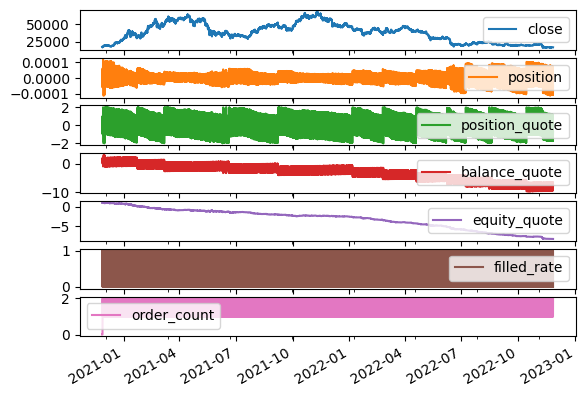

In [12]:
# Define my strategy
class MyBacktest(Backtester):
    def init(self):
        pass

    def on_close(
        self, data: "CloseData[_IndexType]", row: "Series[Any]"
    ) -> Iterable[MarketOrder | LimitOrder]:
        if pd.isna(row["ATR"]):
            return
        if data.position_quote < 1:
            buy_price = data.close - row["ATR"] * 0.5
            yield LimitOrder(size=1 / buy_price, price = buy_price, post_only=True)
        if data.position_quote > -1:
            sell_price = data.close + row["ATR"] * 0.5
            yield LimitOrder(size=-1 / sell_price, price = sell_price, post_only=True)

# Calculate indicators
df["ATR"] = df.ta.atr()

# Run backtest
bt = MyBacktest()
bt(df, maker_fee=-0.025 * 0.01, taker_fee=0.001).plot()

# Finance is not easy...